In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


<h1 style="font-family:verdana;"> <center> Cat vs Dog  A beginner's guide to convolutional neural networks</center> </h1>
<p><center style="color:#159364; font-family:cursive;font-size:25px;"> “Tell me and I forget, teach me and I may remember, involve me and I learn.” – Benjamin Franklinr</center></p>

![catvsdog](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Cat%20Vs%20Dog/cat%20vs%20dog.gif)

<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Please vote up if you like this note book. 🙏
</div>

## Table of Contents

1 [Introduction](#1)

2 [Importing Libraries](#2)

2.1 [Setting Path](#2.1)

2.2 [Importing Data](#2.2)

3 [Data Distribution of whole Data](#3)

4 [Siplting the Data into Train test and Val](#4)

4.1 [Distributation of Train Data](#4.1)

4.2 [Distributation of val Data 5 Displaying Images](#4.2)

5 [Image Data Generator](#5)

6 [Convolutional Neural Network](#6)

6.1 [Displaying The Model](#6.1)


7 [Plotting the result](#7)

8 [Model Evaluation](#8)

8.1[Classification Report](#8.1)

9 [Predition Comparsion](#9)

10 [Confusion Matrix](#10)

<h1  id="1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> Introduction </h1>
           
        

<span style="font-family:cursive; font-size:25px;">In this notebook, we will learn how to classify images of dog and cat by building a simple Neural Network.

What we will learn: </span>


<span style="font-family:cursive; font-size:15px;">Load the images.. </span>


<span style="font-family:cursive; font-size:15px;">
Visulaise the Data distribution of all data. </span>


<span style="font-family:cursive; font-size:15px;">
Visulaise the Data distribution of all data. </span>


<span style="font-family:cursive; font-size:15px;">Visualizing some of the images </span>


<span style="font-family:cursive; font-size:15px;">Making The CNN Network </span>


<span style="font-family:cursive; font-size:15px;">
Use Image Data Generator </span>


<span style="font-family:cursive; font-size:15px;">
Graph the training loss and validation loss </span>


<span style="font-family:cursive; font-size:15px;">Model  Evaluation</span>


<span style="font-family:cursive; font-size:15px;">Confusion Matrix</span>



           
















           
           


<h1  id="2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2 Importing Libraries </h1>
           
 

<span style="font-family:cursive; font-size:15px;">
We are Importing Libraries. </span>


<span style="font-family:cursive; font-size:15px;">Libraries which need for
 </span>


<span style="font-family:cursive; font-size:15px;">Data visualization </span>


<span style="font-family:cursive; font-size:15px;">Making Model Architecture. </span>











In [2]:
''' importing library''' 

import numpy as np
import sys
import tensorflow as tf
import os
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

**Setting Seed**

In [3]:
'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

<a id="2"></a> <br>
# 2. Extarcting Files

In [4]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [5]:
'''test1, train Data is in current working folder'''
print(os.listdir('../working'))

['test1', 'train', '__notebook__.ipynb']


<a id="2.1"></a> <br>
# 2.1 Setting Path

* Setting the path and Image size 

In [6]:
IMAGE_FOLDER_PATH = "../working/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
WIDTH = 150
HEIGHT = 150

In [7]:
FILE_NAMES[0:5]

['cat.4110.jpg',
 'cat.9898.jpg',
 'dog.3986.jpg',
 'cat.8877.jpg',
 'cat.12227.jpg']

In [8]:
labels = []
for i in os.listdir(IMAGE_FOLDER_PATH):
    labels+=[i]

<a id="3"></a> <br>
# 3 Making Data Frame

In [9]:
# empty list
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [10]:
dataset.head(10)

,image_path,target
0,../working/train/cat.4110.jpg,cat
1,../working/train/cat.9898.jpg,cat
2,../working/train/dog.3986.jpg,dog
3,../working/train/cat.8877.jpg,cat
4,../working/train/cat.12227.jpg,cat
5,../working/train/dog.9888.jpg,dog
6,../working/train/cat.10838.jpg,cat
7,../working/train/cat.2496.jpg,cat
8,../working/train/dog.8941.jpg,dog
9,../working/train/cat.3033.jpg,cat


In [11]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
cat    12500
dog    12500
Name: target, dtype: int64


<a id="4"></a> <br>
# 4 Data Distributation

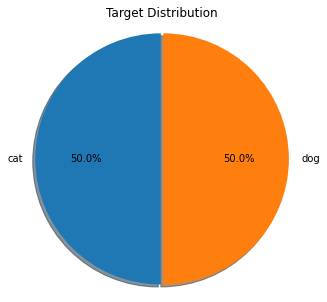

In [12]:
label_count=dataset['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

<a id="4.1"></a> <br>
# 4.1 Displaying Images of Cat

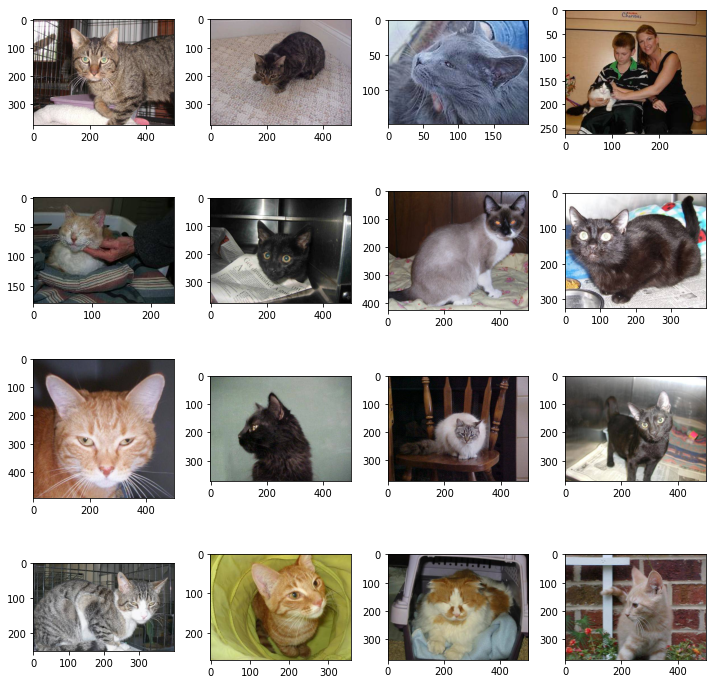

In [13]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

<a id="4.2"></a> <br>
# 4.2 Displaying Images of Dog

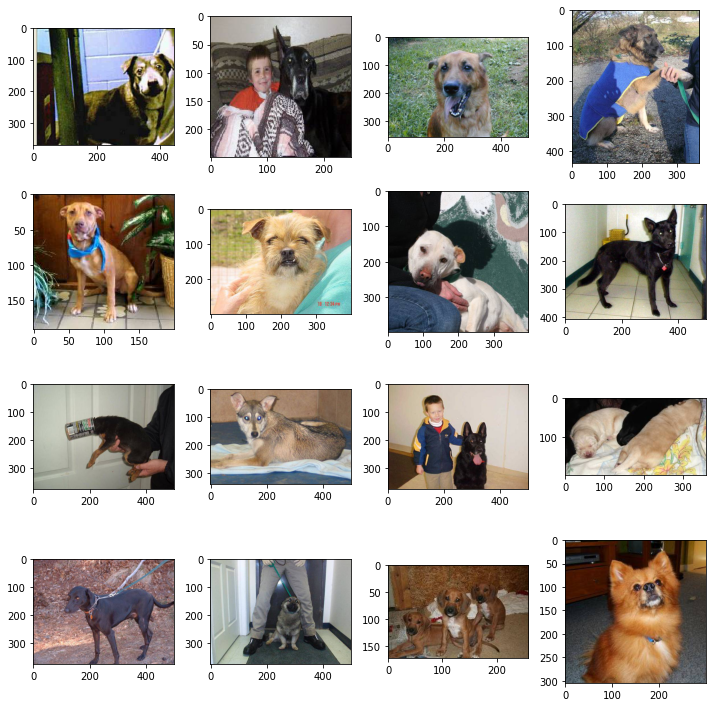

In [14]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

<a id="5"></a> <br>
# 5 Splitting The data

In [15]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=seed)

# **Data Distributaion Visulatization**

In [16]:
class_id_distributionTrain = dataset_train['target'].value_counts()
class_id_distributionTrain.head(10)

dog    10031
cat     9969
Name: target, dtype: int64

<BarContainer object of 2 artists>

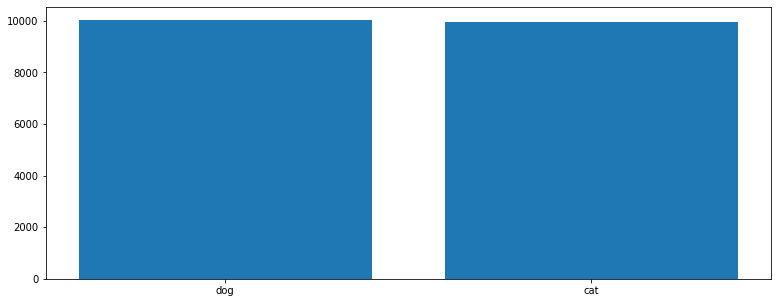

In [17]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distributionTrain.index, class_id_distributionTrain.values)

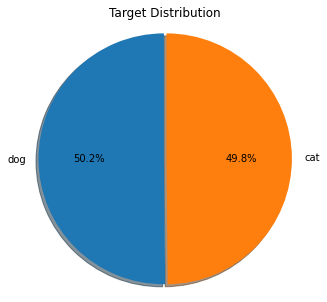

In [18]:
label_count=dataset_train['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

In [19]:
class_id_distributionTest = dataset_test['target'].value_counts()
class_id_distributionTest.head(10)

cat    2531
dog    2469
Name: target, dtype: int64

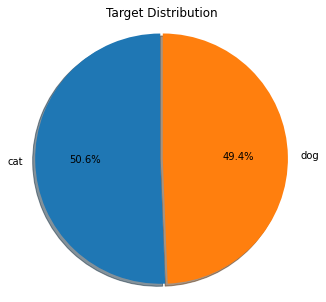

In [20]:
label_count=dataset_test['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

<a id="5.1"></a> <br>
# 5.1 Image DataGenerator

When there is little data to train, we have to use ImageDataGenerator to increase the number of data.
It is recommended to use only scaling for test data.

1. rescale = 1./255 : change the value between 0 and 1

2. rotation_range = 15 : Random rotation within 15 degrees

3. shear_range = 0.1 : shear range 10%

4. zoom_range = 0.2 : zoom range 20%

5. horizontal_flip = True : Randomly flip horizontally.

6. width_shift_range = 0.1 : Randomly move the original image horizontally within 10% of the width

7. height_shift_range=0.1 : Randomly move the original image vertically within 10% of the width


In [21]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


<a id="6"></a> <br>
# 6 Making CNN Model

In [23]:
model = Sequential() # implement model layer 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

2022-07-04 01:24:08.311771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 01:24:08.439153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 01:24:08.439950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 01:24:08.441454: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<a id="6.1"></a> <br>
# 6.1 Displaying Model

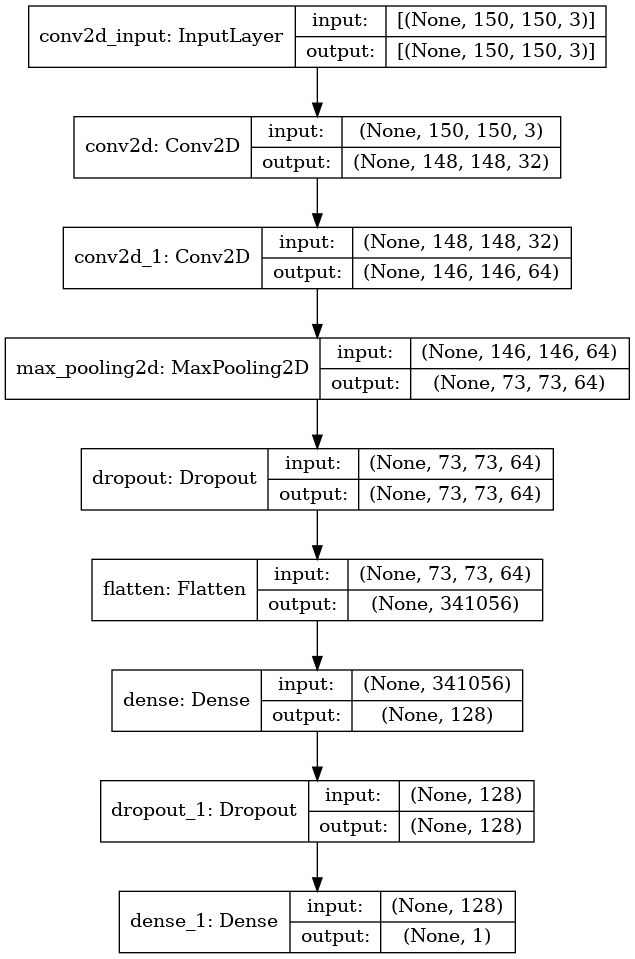

In [24]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [25]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

<a id="7"></a> <br>
# 7 Train The model

In [26]:
History=model.fit(train_datagenerator,
                       epochs=80,
                       validation_data=test_datagenerator,
                       validation_steps=dataset_test.shape[0]/150,
                       steps_per_epoch=dataset_train.shape[0]/150)

2022-07-04 01:24:13.769911: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-07-04 01:24:16.685260: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


133/133 [==============================] - 174s 1s/step - loss: 0.9895 - accuracy: 0.5827 - val_loss: 0.6152 - val_accuracy: 0.6590
Epoch 2/80
133/133 [==============================] - 165s 1s/step - loss: 0.6157 - accuracy: 0.6714 - val_loss: 0.5558 - val_accuracy: 0.7038
Epoch 3/80
133/133 [==============================] - 165s 1s/step - loss: 0.5763 - accuracy: 0.6974 - val_loss: 0.5219 - val_accuracy: 0.7342
Epoch 4/80
133/133 [==============================] - 165s 1s/step - loss: 0.5437 - accuracy: 0.7244 - val_loss: 0.4903 - val_accuracy: 0.7590
Epoch 5/80
133/133 [==============================] - 166s 1s/step - loss: 0.5232 - accuracy: 0.7404 - val_loss: 0.4881 - val_accuracy: 0.7646
Epoch 6/80
133/133 [==============================] - 166s 1s/step - loss: 0.5088 - accuracy: 0.7485 - val_loss: 0.4683 - val_accuracy: 0.7786
Epoch 7/80
133/133 [==============================] - 163s 1s/step - loss: 0.4895 - accuracy: 0.7655 - val_loss: 0.4532 - val_accuracy: 0.7820
Epoch 8/80

<a id="8"></a> <br>
# 8 Plotting The Result

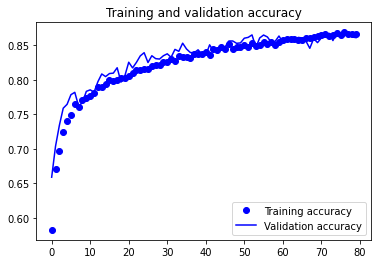

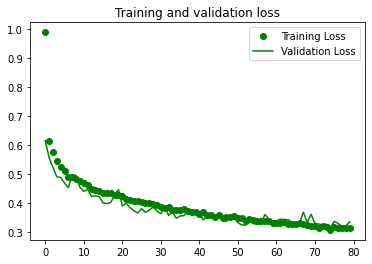

In [27]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[](http://)



<a id="9"></a> <br>
# 9 Predict the Results

In [28]:
 test_loss, test_acc = model.evaluate(test_datagenerator, steps=len(test_datagenerator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

34/34 [==============================] - 15s 431ms/step - loss: 0.3351 - accuracy: 0.8612
Loss: 33.507
Accuracy: 86.120


# Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

In [30]:
predictions = model.predict(x=test_datagenerator, steps= len(test_datagenerator), verbose=0)

In [31]:
test_datagenerator.classes

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,


In [32]:
cm = confusion_matrix(y_true=test_datagenerator.classes, y_pred=np.argmax(predictions, axis=-1))

In [33]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')




<a id="10"></a> <br>
# 10 onfusion Matrix Plot


Confusion matrix, without normalization
[[2531    0]
 [2469    0]]


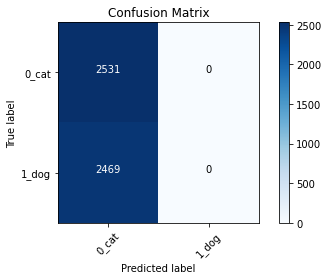

In [34]:
cm_plot_labels = ['0_cat', '1_dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')